In [16]:

#acquires the data, prepares it, puts it into a df
import wrangle


#work with the data
import pandas as pd 
import numpy as np
from scipy import stats
from math import sqrt

# visualize the data
import seaborn as sns
import matplotlib.pyplot as plt 


#sklearn 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from scipy import stats
import sklearn.preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler


import warnings
warnings.filterwarnings('ignore')

In [11]:
df = wrangle.wrangle_zillow()

In [12]:
train, validate, test = wrangle.split_zillow_data(df)

In [13]:
train.shape, validate.shape, test.shape

((1172964, 7), (502700, 7), (418917, 7))

In [14]:
# Stratify with taxvaluedollarcnt
x_train = train.drop(columns=["taxvaluedollarcnt"])
y_train = train.taxvaluedollarcnt

x_validate = validate.drop(columns=["taxvaluedollarcnt"])
y_validate = validate.taxvaluedollarcnt

X_test = test.drop(columns=["taxvaluedollarcnt"])
x_test = test.taxvaluedollarcnt

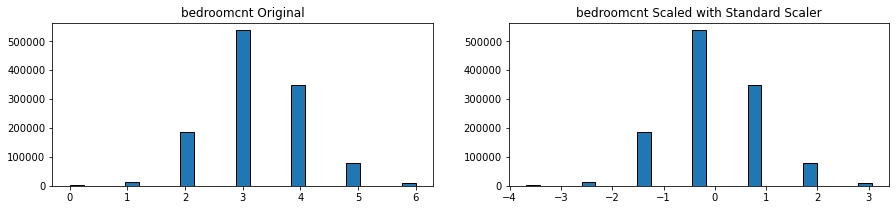

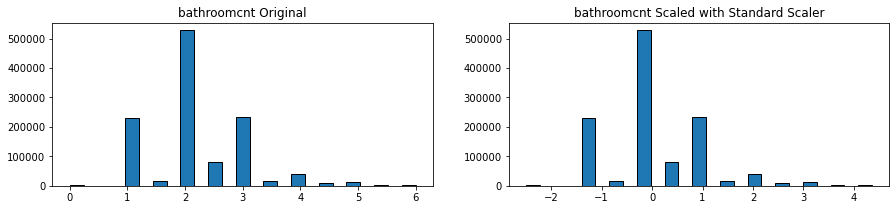

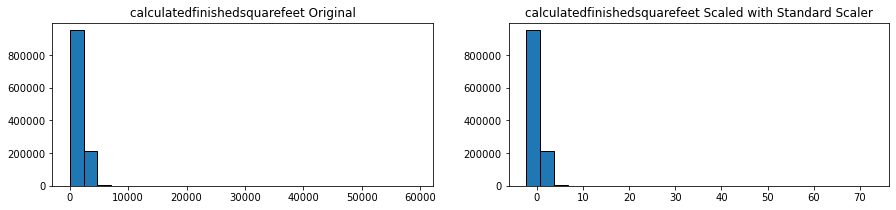

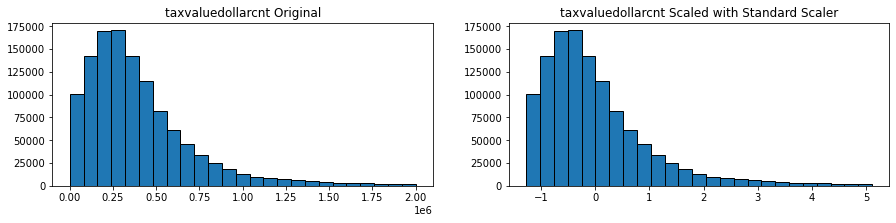

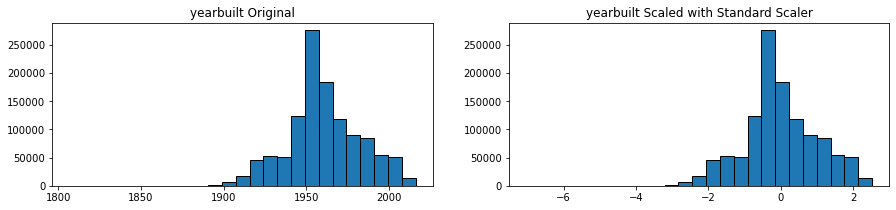

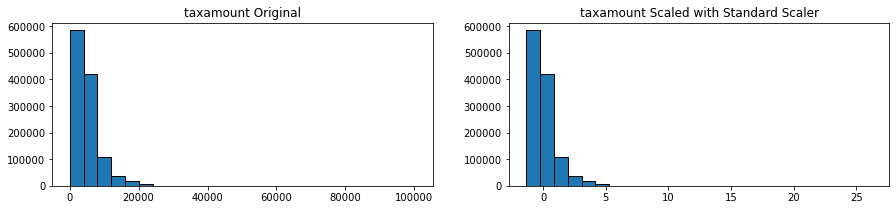

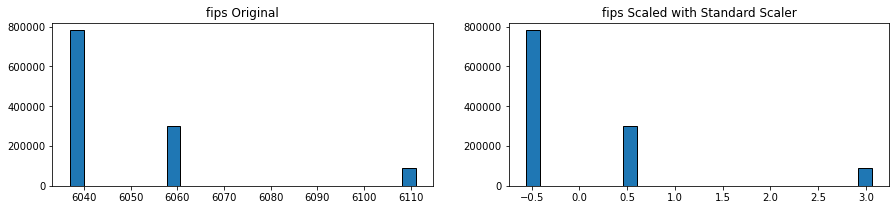

In [17]:
std_scaler = StandardScaler()

for column in train.columns:
    standard_scaled = std_scaler.fit_transform(np.array(train[column]).reshape(-1,1))
    plt.figure(figsize=(15, 3))
    plt.subplot(121)
    plt.hist(train[column], ec='black', bins =25)
    plt.title(f'{column} Original')
    plt.subplot(122)
    plt.hist(standard_scaled, ec='black', bins =25)
    plt.title(f'{column} Scaled with Standard Scaler')


In [24]:
standard_scaled

array([[-0.55654372],
       [-0.55654372],
       [-0.55654372],
       ...,
       [ 0.52037151],
       [-0.55654372],
       [-0.55654372]])

In [25]:
x_train

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,yearbuilt,taxamount,fips
725234,3,2.0,1559,1947,3883.48,6037
1918802,3,3.0,1846,1940,4325.88,6037
855663,4,3.0,2679,1951,3793.56,6037
1574380,3,1.0,1142,1954,1818.65,6037
1266021,2,1.0,1043,1973,1658.36,6037
...,...,...,...,...,...,...
1643347,5,3.0,2192,1976,8348.29,6037
915383,4,3.0,2882,2015,4939.05,6037
224023,4,2.0,1988,1966,1462.92,6059
88634,2,2.0,1021,1989,2099.95,6037


In [30]:
scaler = sklearn.preprocessing.MinMaxScalar()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
standard_scaled = scaler.fit_transform(x_train).reshape(-1,1)
x_train_scaled = scaler.transform(x_train)
x_validate_scaled = scaler.transform(x_validate)
x_test_scaled = scaler.transform(x_test)


AttributeError: module 'sklearn.preprocessing' has no attribute 'MinMaxScalar'